/Users/3kh/anaconda3/lib/python3.6/site-packages/skimage/filters/thresholding.py:271: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (418, 549, 3) looks like an RGB image
  warn(msg.format(image.shape))
/Users/3kh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


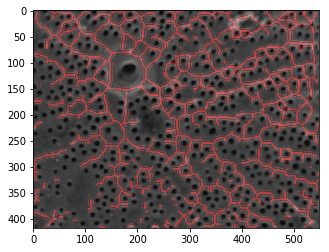

In [170]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('cropped_Wild010.tif')
blur = cv2.blur(img,(15,15))
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)
from skimage.filters import threshold_otsu
thotsu=threshold_otsu(blur)
otsublur = blur[:,:,0]> thotsu

from skimage.morphology import skeletonize
otsuskeleton = skeletonize(otsublur)
imgplot = plt.imshow(img, alpha=0.9)
ax = plt.subplot()
ax.imshow(otsuskeleton, cmap=red2, interpolation='sinc', alpha=.42) 

In [171]:
from PIL import Image
im=Image.open('cropped_Wild010.tif')
width, height=im.size

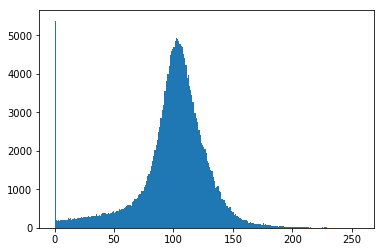

98.03607690363515

In [172]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('cropped_Wild010.tif',0)
plt.hist(img.ravel(),256,[0,256])
plt.show()

np.mean(img)


In [173]:
#import statistics
#statistics.mode(mode)

In [174]:
partialstd=(np.std(img)/2)
lower=np.mean(img)-partialstd
print("lower =",lower)
upper=np.mean(img)+partialstd
print("upper =",upper)

lower = 82.0728289534323
upper = 113.99932485383799


In [175]:
#dilating the blurred image
#from skimage.morphology import dilation
#dilated_img=dilation(img)
#image=plt.subplot()
#image.imshow(dilated_img)

#blur = cv2.blur(img,(17, 17))
#plt.subplot(121),plt.imshow(img)
#plt.xticks([]), plt.yticks([])
#plt.subplot(122),plt.imshow(blur)
#plt.xticks([]), plt.yticks([])
#plt.show()
#np.shape(blur)




#cv2.imwrite('blur_Wild010.tif',blur)

In [176]:
from skimage.filters import threshold_otsu
thres=threshold_otsu(img)
print(thres)


73


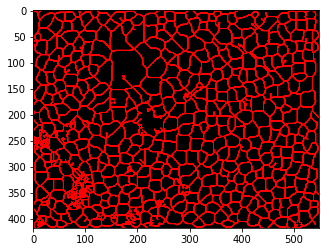

In [177]:
thresh = img[:,:] > thres

from skimage.morphology import skeletonize
skeleton = skeletonize(thresh)
ax = plt.subplot()

ax.imshow(skeleton, cmap=red2, interpolation= 'bilinear')

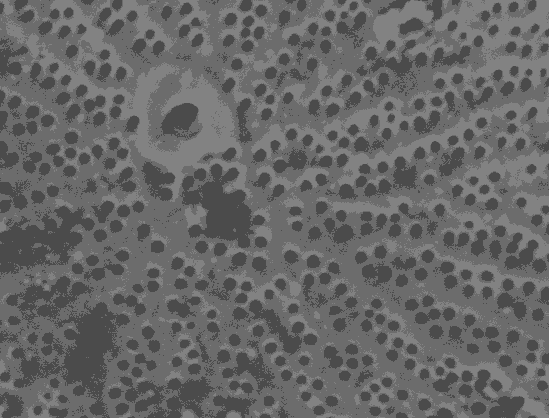

In [178]:
im.quantize(3,0)

<PIL.Image.Image image mode=P size=549x418 at 0x1C2A9E4978>


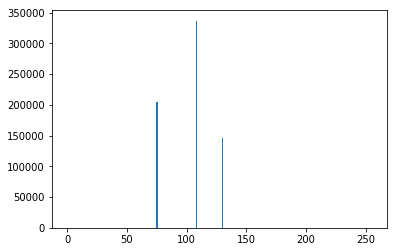

In [179]:
image=im.quantize(3,0)
image.save('simple_Wild010.tif')
print(image)
newimg = cv2.imread('simple_Wild010.tif')
plt.hist(newimg.ravel(),256,[0,255]); plt.show()

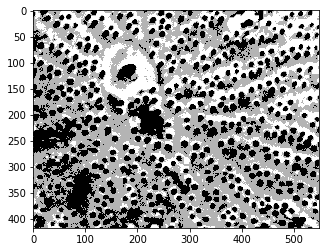

In [180]:
newimg[np.where(newimg == [130])] = [255]
newimg[np.where(newimg == [108])] = [180]
newimg[np.where(newimg == [75])] = [0]
newimg[np.where(newimg == [161])] = [0]
plt.imshow(newimg, cmap='gray')

0
(418, 549, 3)
(418, 549)


/Users/3kh/anaconda3/lib/python3.6/site-packages/skimage/filters/thresholding.py:271: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (418, 549, 3) looks like an RGB image
  warn(msg.format(image.shape))


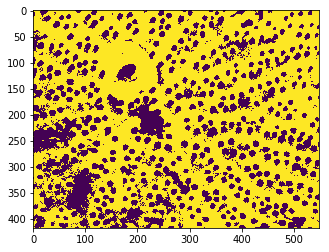

In [184]:
#OTSU THRESHOLDING

from skimage.filters import threshold_otsu
th=threshold_otsu(newimg)
print(th)


print(np.shape(newimg))
newnewimg=newimg[:,:,0]
print(np.shape(newnewimg))

threshold = newimg[:,:,0] > th
plt.imshow(threshold)

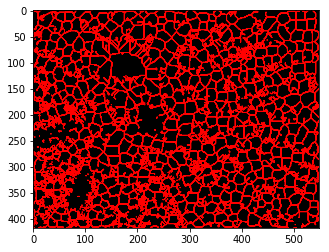

In [185]:
#OTSU SKELETON

from skimage.morphology import skeletonize
skeleton = skeletonize(threshold)
ax = plt.subplot()
 
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)
ax.imshow(skeleton, cmap=red2, interpolation= 'bilinear')

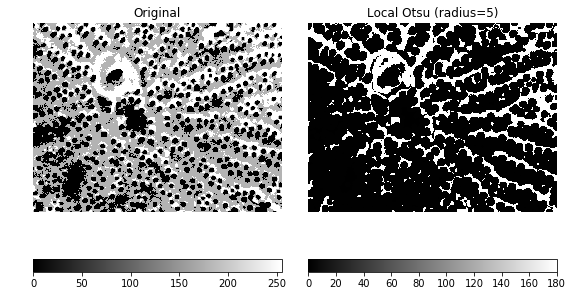

In [189]:
#LOCAL THRESHOLDING 

from skimage.morphology import disk
from skimage.filters import  rank
from skimage.util import img_as_ubyte

lum_img = img_as_ubyte(newnewimg)


#what is the disk thing****
radius =5
selem = disk(radius)

local_otsu = rank.otsu(lum_img, selem)


fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharex=True, sharey=True)
ax = axes.ravel()
plt.tight_layout()

fig.colorbar(ax[0].imshow(lum_img, cmap=plt.cm.gray),
             ax=ax[0], orientation='horizontal')
ax[0].set_title('Original')
ax[0].axis('off')

#fig.colorbar(ax[1].imshow(local_otsu, cmap=plt.cm.gray),
#             ax=ax[1], orientation='horizontal')
ax[1].set_title('Local Otsu (radius=%d)' % radius)
ax[1].axis('off')

plt.show()

#not so good